<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-Ice" data-toc-modified-id="Read-Ice-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read Ice</a></span><ul class="toc-item"><li><span><a href="#BP12-sea-ice" data-toc-modified-id="BP12-sea-ice-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>BP12 sea ice</a></span><ul class="toc-item"><li><span><a href="#map" data-toc-modified-id="map-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>map</a></span></li><li><span><a href="#Get-February-(min)-and-September-(max)-mean-map" data-toc-modified-id="Get-February-(min)-and-September-(max)-mean-map-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Get February (min) and September (max) mean map</a></span></li><li><span><a href="#BP12-timeseries" data-toc-modified-id="BP12-timeseries-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>BP12 timeseries</a></span></li></ul></li><li><span><a href="#OBC-NSIDC-Clim" data-toc-modified-id="OBC-NSIDC-Clim-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>OBC NSIDC Clim</a></span><ul class="toc-item"><li><span><a href="#Map-clim" data-toc-modified-id="Map-clim-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Map clim</a></span></li><li><span><a href="#Min/Max" data-toc-modified-id="Min/Max-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Min/Max</a></span></li><li><span><a href="#Obs-timeseries" data-toc-modified-id="Obs-timeseries-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Obs timeseries</a></span></li></ul></li></ul></li><li><span><a href="#Plot" data-toc-modified-id="Plot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot</a></span><ul class="toc-item"><li><span><a href="#Rearrange-climatology-to-start-in-July" data-toc-modified-id="Rearrange-climatology-to-start-in-July-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Rearrange climatology to start in July</a></span></li><li><span><a href="#Difference-between-model-and-observation" data-toc-modified-id="Difference-between-model-and-observation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Difference between model and observation</a></span></li><li><span><a href="#Plot-Min/max-sea-ice-extent" data-toc-modified-id="Plot-Min/max-sea-ice-extent-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot Min/max sea ice extent</a></span></li><li><span><a href="#Plot-sea-ice-growth" data-toc-modified-id="Plot-sea-ice-growth-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Plot sea ice growth</a></span></li></ul></li></ul></div>

# Plot sea ice


Plot sea ice annual minimum, maximum and distribution from the BIOPERIANT12 vs NSIDC monthly means

**Analysis Source :**  
Marcel du Plessis, Alice D. Lebehot

In [1]:
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.append(src_path)
import bp12_tools as bp12
import bp12_tools.plot_utils as pu

import numpy as np
import xarray as xr

from cartopy import crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

---

## Read Ice

### BP12 sea ice

#### map

In [2]:
seaice_mdl_mnth_clim =xr.open_dataset(f"../data/ICE/BIOPERIANT12_seaice_clim_monthly.nc")

#### Get February (min) and September (max) mean map

In [3]:
si_mean_min = seaice_mdl_mnth_clim.isel(time=1)
si_mean_max = seaice_mdl_mnth_clim.isel(time=8)

In [4]:
sim_mean_min = si_mean_min.where((si_mean_min >= 0.15) & (si_mean_min < 1))
sim_mean_max = si_mean_max.where((si_mean_max >= 0.15) & (si_mean_max < 1))

#### BP12 timeseries

In [2]:
df_m = xr.open_dataset(f'../data/ICE/BIOPERIANT12_timeseries_sie_IA_monthly.nc')

In [3]:
dfm_mean = df_m.sie.groupby(df_m['time'].dt.month).mean()
dfm_std = df_m.sie.groupby(df_m['time'].dt.month).std()

### OBC NSIDC Clim

#### Map clim

In [7]:
seaice_obs_mnth_clim = xr.open_dataset(f"../data/ICE/OBS_seaice_clim_monthly.nc")

#### Min/Max

In [8]:
sio_mean_min = seaice_obs_mnth_clim.seaice_conc_monthly_cdr.isel(time=1)
sio_mean_max = seaice_obs_mnth_clim.seaice_conc_monthly_cdr.isel(time=8)

sio_mean_min = sio_mean_min.where((sio_mean_min >= 0.15) & (sio_mean_min < 1))
sio_mean_max = sio_mean_max.where((sio_mean_max >= 0.15) & (sio_mean_max < 1))

#### Obs timeseries

In [4]:
df_o = xr.open_dataset(f'../data/ICE/OBS_sie_IA_monthly.nc')

In [5]:
dfo_mean = df_o.sie.groupby(df_o['time'].dt.month).mean()
dfo_std  = df_o.sie.groupby(df_o['time'].dt.month).std()

## Plot

### Rearrange climatology to start in July

In [11]:
obs_mean = np.concatenate((dfo_mean[6:], dfo_mean[:6]))
mdl_mean = np.concatenate((dfm_mean[6:], dfm_mean[:6]))
obs_std  = np.concatenate((dfo_std[6:], dfo_std[:6]))
mdl_std  = np.concatenate((dfm_std[6:], dfm_std[:6]))

###  Difference between model and observation

In [12]:
diffMean = mdl_mean - obs_mean

# Grow melt: difference between one month with the previous on
diffMeanObs = np.insert(np.diff(obs_mean), 0, obs_mean[0] - obs_mean[-1])

 # First value doesn't have a difference, so we define one using the last data 

diffMeanModel = np.insert(np.diff(mdl_mean), 0, mdl_mean[0] - mdl_mean[-1])

### Plot Min/max sea ice extent

In [13]:
def customise_plot(axin,maxmin, dataset="mdl"):
    '''
    Add boundary box to plot
    '''
    handles = [mpl.patches.Patch(color='#472a72'), mpl.patches.Patch(color='#59bc6b')]
    leg1 = axin.legend(handles, maxmin, fontsize=12,
                 bbox_to_anchor=(0, -0.2, 0.4, 0.2), loc="lower left", ncol=2)
    axin.add_artist(leg1)
    pu.maps.map_decorator(axin)
    axin.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    axin.outline_patch.set_edgecolor('black')
    axin.outline_patch.set_linewidth(1.5)
    axin.outline_patch.set_alpha(0.8)

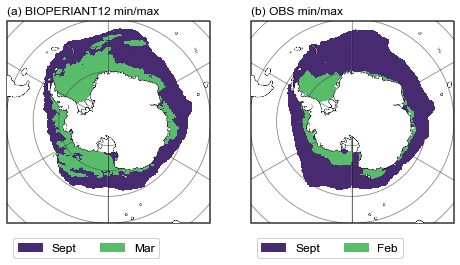

In [14]:
fig = plt.figure(figsize=(8, 4))

cmap_max = mpl.colors.ListedColormap(['#472a72','#59bc6b'])

######### -------------- BIOPERIANT12 SEA ICE MAX/MIN -------------- ###########
ax = fig.add_subplot(1, 2, 1, projection = ccrs.Stereographic(central_latitude=-90))
mesh = ax.pcolormesh(sim_mean_max.lon, sim_mean_max.lat, 
                     sim_mean_max.ileadfra.values, 
                     vmin=0.99, vmax=1, cmap=cmap_max,
                     transform=ccrs.PlateCarree(), zorder=0)

mesh = ax.pcolormesh(sim_mean_min.lon, sim_mean_min.lat, 
                     sim_mean_min.ileadfra.values, 
                     vmin=-0.1, vmax=0, cmap=cmap_max,
                     transform=ccrs.PlateCarree(), zorder=0)
customise_plot(ax, ['Sept','Mar'], "mdl")
plt.title('(a) BIOPERIANT12 min/max',loc='left',fontsize=12)


######### -------------- OBS SEA ICE MAX/MIN -------------- ###########
ax = fig.add_subplot(1, 2, 2, projection = ccrs.Stereographic(central_latitude=-90))
mesh = ax.pcolormesh(seaice_obs_mnth_clim.longitude, seaice_obs_mnth_clim.latitude, 
                     sio_mean_max.values, 
                     vmin=0.99, vmax=1, cmap=cmap_max,
                     transform=ccrs.PlateCarree(), zorder=0)

mesh = ax.pcolormesh(seaice_obs_mnth_clim.longitude, seaice_obs_mnth_clim.latitude, 
                     sio_mean_min.values, 
                     vmin=-0.1, vmax=0, cmap=cmap_max,
                     transform=ccrs.PlateCarree(), zorder=0)
customise_plot(ax, ['Sept','Feb'], "obs")
plt.title('(b) OBS min/max',loc='left',fontsize=12)

plt.tight_layout()
plt.savefig(f'../figures/Fig5ab_seaice.png', bbox_inches='tight')

### Plot sea ice growth

In [15]:
mths=pu.formatting.get_mo_titles()[:]

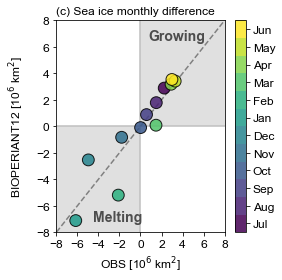

In [16]:
cmap=plt.cm.viridis
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
cmaplist[0] = (.5, .5, .5, 1.0)

fig, ax = plt.subplots(figsize=[4, 4])

# define the bins and normalize
bounds = np.linspace(0, 12, 13)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
sc=ax.scatter(diffMeanObs, diffMeanModel, 140, c=np.arange(0, 12, 1), cmap=cmap, norm=norm, zorder=30, edgecolor='k', alpha=0.85)

c=plt.colorbar(sc, ticks=np.arange(0.5, 13.5, 1))
c.ax.set_yticklabels(mths, fontsize=12)

#ax.grid(zorder=1, lw=1, ls='-', c='0.75', alpha=0.5)

ax.plot([-8, 8], [0, 0], c='0.75', lw=1.5)
ax.plot([0, 0], [-8, 8], c='0.75', lw=1.5)
ax.set_ylim(-8, 8)
ax.set_xlim(-8, 8)

ax.plot([-8, 8], [-8, 8], c='0.5', ls='--')
ax.set_xlabel('OBS [10$^6$ km$^2$]', labelpad=5, fontsize=12)
ax.set_ylabel('BIOPERIANT12 [10$^6$ km$^2$]', labelpad=10, fontsize=12)
ax.tick_params(labelsize=12)
ax.set_title('(c) Sea ice monthly difference', loc='left', fontsize=12)
ax.text(-4.5, -7.2, 'Melting', fontweight='bold', fontsize=14, color='0.3')
ax.text(0.75, 6.5, 'Growing', fontweight='bold', fontsize=14, color='0.3')

ax.xaxis.set_ticks(np.arange(-8, 10, 2))

ax.set_rasterized(True)

ax.fill_between([-8, 0], [-8, -8], [0, 0], facecolor='lightgrey', alpha=0.7)
ax.fill_between([0, 8], [0, 0], [8, 8], facecolor='lightgrey', alpha=0.7)
plt.tight_layout()
plt.savefig(f'../figures/Fig5c_seaice.png', bbox_inches='tight')

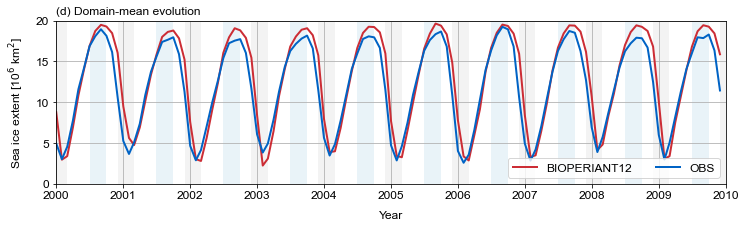

In [6]:
red, blue = pu.formatting.get_rbg_colors('r'), pu.formatting.get_rbg_colors('b')
ymin = 0; ymax = 22
alpha = 0.7


fig, ax = plt.subplots(figsize=[12, 3])

ax.plot(df_o.time, df_m.sie.values, c=red, lw=2, label='BIOPERIANT12')
plt.plot_date(df_o.time, df_o.sie.values,'-', c=blue, lw=2, label='OBS')
frame1 = plt.gca()

pu.timeseries.add_seas(ax, [0,22])
ax.tick_params(labelsize=12)

plt.ylim([0, 20])
plt.xlim([np.datetime64('1999-12-31'), np.datetime64('2010-01-01')])
ax.legend(loc='best', ncol=2, fontsize=12)
ax.grid()
ax.set_ylabel('Sea ice extent [10$^6$ km$^2$]', labelpad=10, fontsize=12)
ax.set_xlabel('Year', labelpad=10, fontsize=12)
ax.set_rasterized(True)
plt.title('(d) Domain-mean evolution',loc='left',fontsize=12)
plt.savefig(f'../figures/Fig5d_seaice.png', bbox_inches='tight')

# Paste images together

In [7]:
from PIL import Image

In [8]:
im0 = Image.open(f'../figures/Fig5ab_seaice.png')
im1 = Image.open(f'../figures/Fig5c_seaice.png')
im2 = Image.open(f'../figures/Fig5d_seaice.png')
im_final  = Image.new('RGB', (im2.width, 10+im0.height+im2.height), (255, 255, 255))
im_final.paste(im0,(0, 0))
im_final.paste(im1,(im0.width+5, 0))
im_final.paste(im2, (0, im0.height+10))
im_final.show()
im_final.save(f'../figures/f05.png')